In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
from pathlib import Path
import math

In [31]:
file_path = Path.cwd() / "Daily_Power_Gen_States_march_23.csv"
df=pd.read_csv(file_path)
df.head(30)

,Region,States,Max.Demand Met during the day(MW),Shortage during maximum Demand(MW),Energy Met (MU),date
0,NER,Mizoram,77,1.0,1.2,2015-01-01
1,WR,DD,214,0.0,4.8,2015-01-01
2,WR,Goa,383,0.0,7.3,2015-01-01
3,WR,Maharashtra,14837,57.0,315.0,2015-01-01
4,WR,MP,5740,0.0,109.8,2015-01-01
5,WR,Gujarat,11383,0.0,246.4,2015-01-01
6,WR,Chhattisgarh,3052,18.0,64.6,2015-01-01
7,WR,DNH,581,0.0,14.0,2015-01-01
8,NR,Chandigarh,224,0.0,3.8,2015-01-01
9,NR,HP,1367,0.0,25.1,2015-01-01


In [32]:
df.drop(["Max.Demand Met during the day(MW)","Shortage during maximum Demand(MW)","Region"], axis=1,inplace=True)


In [33]:
df.sort_values(by=['States','Energy Met (MU)'],inplace=True)


In [34]:
df.query("States not in ['AMNSIL','BALCO','DNH','DNHDDPDCL','DVC','Essar steel','Railways_NR ISTS','Pondy', 'Puducherry']",inplace=True)



In [35]:
df['States'].replace({
    'J&K':'Jammu & Kashmir',
    'J&K(UT)':'Jammu & Kashmir',
    'J&K(UT) &':'Jammu & Kashmir',
    'J&K(UT) & \nLadakh(UT)':'Jammu & Kashmir',
    'J&K(UT) & Ladakh(UT)':'Jammu & Kashmir',
    'J&K(UT) and Ladakh(UT)':'Jammu & Kashmir',
    'DD':'Daman & Diu',
    'MP':'Madhya Pradesh',
    'UP':'Uttar Pradesh',
    'HP':'Himachal Pradesh'},
    inplace=True)
df['States']=df['States'].str.strip()



C:\Users\HP\AppData\Local\Temp\ipykernel_15484\2910808681.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['States'].replace({


In [36]:
df.head(30)

,States,Energy Met (MU),date
9806,Andhra Pradesh,93.5,2014-06-03
69887,Andhra Pradesh,96.8,2015-11-17
74251,Andhra Pradesh,101.2,2015-11-18
111468,Andhra Pradesh,101.2,2014-10-27
76371,Andhra Pradesh,103.4,2016-05-19
107341,Andhra Pradesh,104.8,2014-10-26
90965,Andhra Pradesh,105.3,2015-11-22
115674,Andhra Pradesh,105.3,2014-10-28
78433,Andhra Pradesh,105.9,2015-11-19
94752,Andhra Pradesh,106.6,2014-10-23


In [37]:
df_sorted = df.sort_values(by=["States", "date"])

for state, group in df_sorted.groupby("States"):
    print(f"\n--- {state} ---")
    print(group.head(10))


--- Andhra Pradesh ---
                States  Energy Met (MU)        date
124744  Andhra Pradesh            253.7  2013-03-31
1145    Andhra Pradesh            248.5  2013-04-01
5194    Andhra Pradesh            249.0  2013-04-02
9201    Andhra Pradesh            249.0  2013-04-03
13231   Andhra Pradesh            253.9  2013-04-04
17561   Andhra Pradesh            246.0  2013-04-05
21524   Andhra Pradesh            248.9  2013-04-06
25507   Andhra Pradesh            246.5  2013-04-07
29719   Andhra Pradesh            250.5  2013-04-08
33930   Andhra Pradesh            249.0  2013-04-09

--- Arunachal Pradesh ---
                   States  Energy Met (MU)        date
124756  Arunachal Pradesh              1.4  2013-03-31
1118    Arunachal Pradesh              1.2  2013-04-01
5206    Arunachal Pradesh              1.1  2013-04-02
9200    Arunachal Pradesh              0.9  2013-04-03
13224   Arunachal Pradesh              1.0  2013-04-04
17550   Arunachal Pradesh              1.0  201

In [38]:
df['date']=pd.to_datetime(df['date'],errors='coerce')

In [39]:
df=df.groupby("States").apply(lambda f:f[(f['Energy Met (MU)']>=f['Energy Met (MU)'].quantile(0.01))&(f['Energy Met (MU)']<=f['Energy Met (MU)'].quantile(0.99))])


C:\Users\HP\AppData\Local\Temp\ipykernel_15484\4144970614.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df=df.groupby("States").apply(lambda f:f[(f['Energy Met (MU)']>=f['Energy Met (MU)'].quantile(0.01))&(f['Energy Met (MU)']<=f['Energy Met (MU)'].quantile(0.99))])


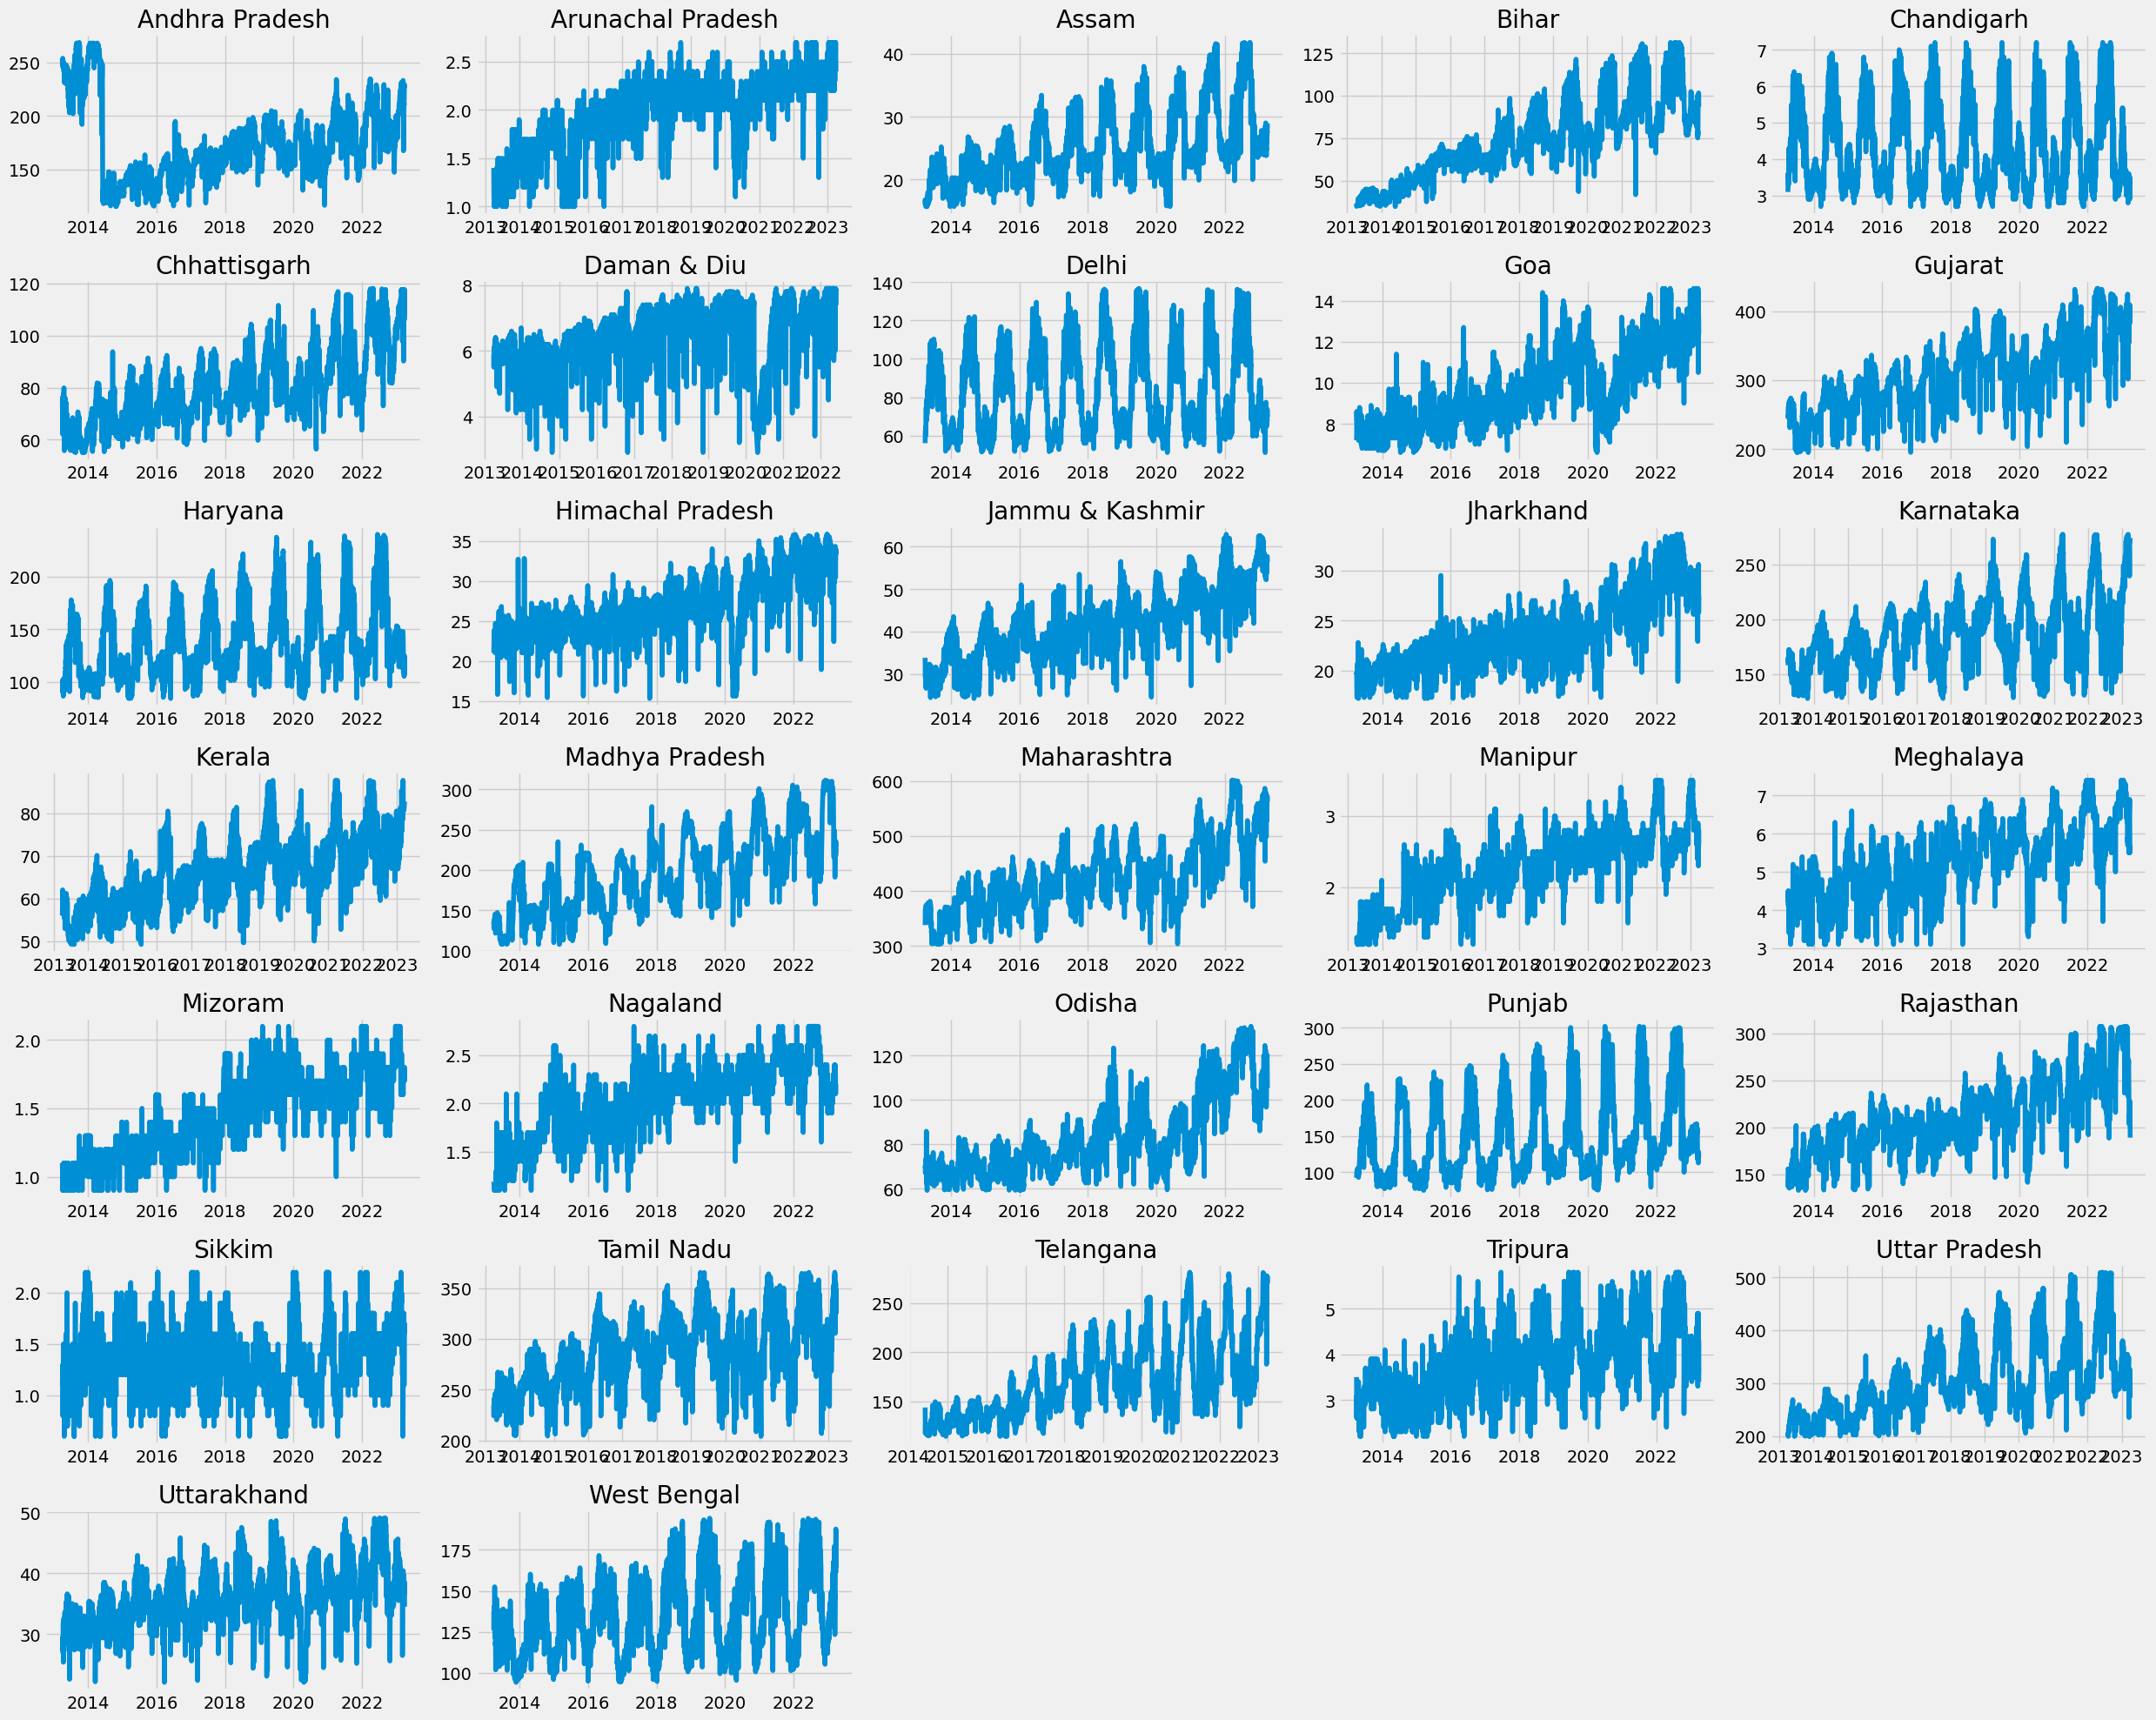

In [42]:
state_list=df['States'].unique()
n=len(state_list)
cols=5
rows=math.ceil(n/cols)
fig, axes=plt.subplots(rows,cols,figsize=(25,20),sharex=False,sharey=False)
axes=axes.flatten()
for i, states in enumerate(state_list):
    graph_1=df[df['States']==states].sort_values('date')
    axes[i].plot(graph_1['date'],graph_1['Energy Met (MU)'])
    axes[i].set_title(states)
for j in range (i+1,len(axes)):
     fig.delaxes(axes[j])
                    
plt.tight_layout()
    



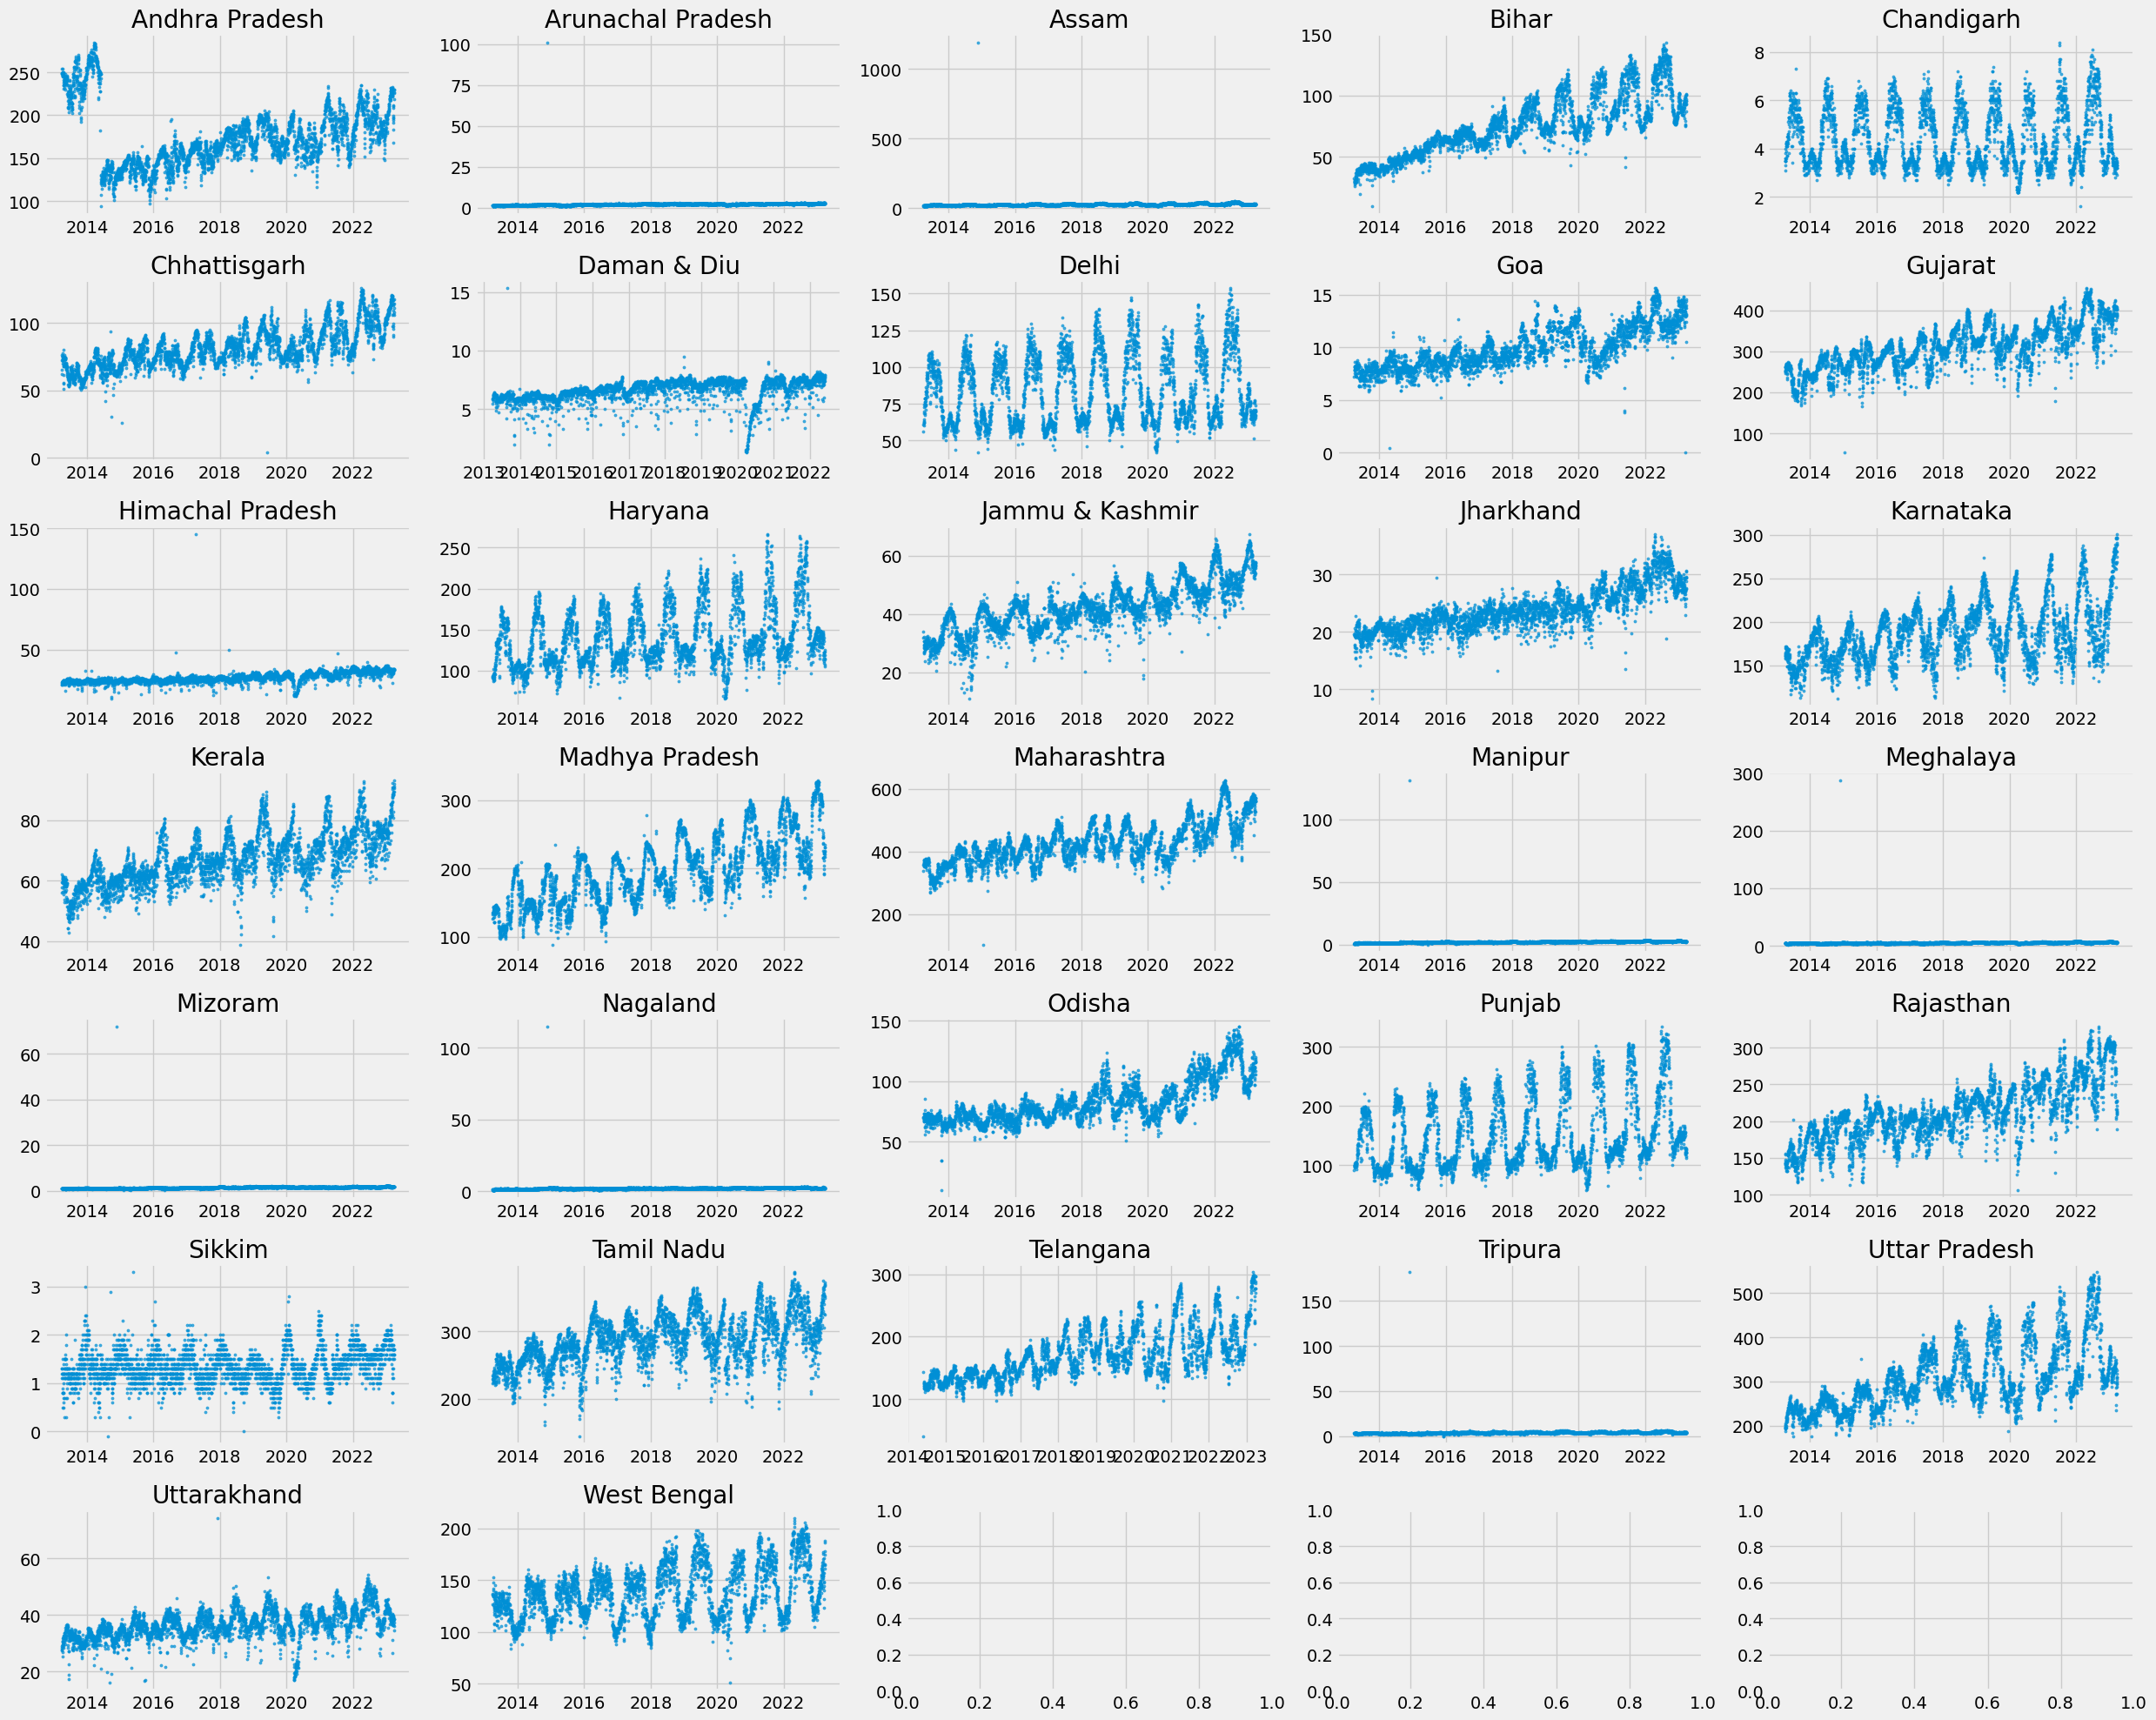

In [16]:
state_list=df['States'].unique()
n=len(state_list)
cols=5
rows=math.ceil(n/cols)
fig, axes=plt.subplots(rows,cols,figsize=(25,20),sharex=False,sharey=False)
axes=axes.flatten()
for i, states in enumerate(state_list):
    graph_1=df[df['States']==states].sort_values('date')
    axes[i].scatter(graph_1['date'],graph_1['Energy Met (MU)'],s=5,alpha=0.7)
    axes[i].set_title(states)
    plt.tight_layout()
